# Telco Customer Churn

## Introduction
* The main goal of this project is to build a model using different Supervised Learning algorithms using the dataset: *Sample Telco Customer Churn Dataset*.
* After analyzing our dataset and applying these algorithms, we want our model to be able to predict if a customer is likely to be lost to a competitor.

## Dataset
* The dataset is composed by the following columns:
    * customerID: A unique ID that identifies each customer.
    * gender: The customer’s gender: Male (1), Female (0).
    * SeniorCitizen: Indicates if the customer is 65 or older: No (0), Yes (1).
    * Partner: Service contract is resold by the partner: No (0), Yes (1).
    * Dependents: Indicates if the customer lives with any dependents: No (0), Yes (1).
    * Tenure: Indicates the total amount of months that the customer has been with the company.
    * PhoneService: Indicates if the customer subscribes to home phone service with the company: No (0), Yes (1).
    * MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: No (0), Yes (1).
    * InternetService: Indicates if the customer subscribes to Internet service with the company: No (0), DSL (1), Fiber optic (2).
    * OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: No (0), Yes (1), NA (2).
    * OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: No (0), Yes (1), NA (2).
    * DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: No (0), Yes (1), NA (2).
    * TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: No (0), Yes (1), NA (2).
    * StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
    * StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
    * Contract: Indicates the customer’s current contract type: Month-to-Month (0), One Year (1), Two Year (2).
    * PaperlessBilling: Indicates if the customer has chosen paperless billing: No (0), Yes (1).
    * PaymentMethod: Indicates how the customer pays their bill: Bank transfer - automatic (0), Credit card - automatic (1), Electronic cheque (2), Mailed cheque (3).
    * MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
    * TotalCharges: Indicates the customer’s total charges.
    * Churn: Indicates if the customer churn or not: No (0), Yes (1).

## Development
* To predict likelihood of a costumer leaving the service, we used four different algorithms for our model: Decision Trees, Support Vector Regression (SVR), K-Nearest Neighbors and Neural Networks (Multi-layer Perceptron).
* After making the predictions, a smaller sample of data is used in order to estimate how the models are expected to perform in general when used to make predictions on data not used during the training of these models.

## Code

In [ ]:
import pandas as pd

churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')
churn_data_tests = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2_Test.csv')

### First collection of data from the dataset
* We started our evaluation by making graphs that would help us understand the correlation between variables and the behaviour of every one of them regarding churn.

In [ ]:
churn_data.head()

In [13]:
churn_data.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

<AxesSubplot:xlabel='Churn', ylabel='count'>

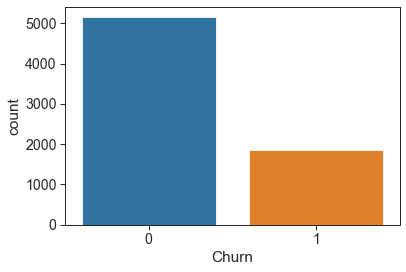

<AxesSubplot:xlabel='Churn', ylabel='count'>

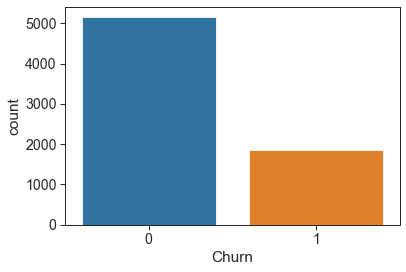

In [15]:
sb.countplot(x='Churn', data=churn_data)

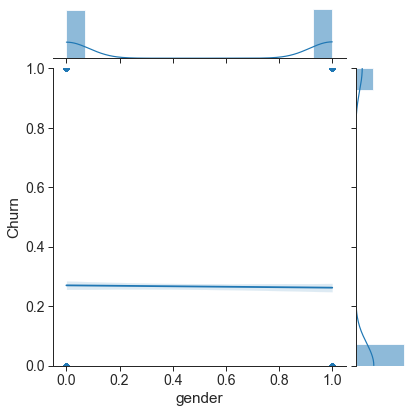

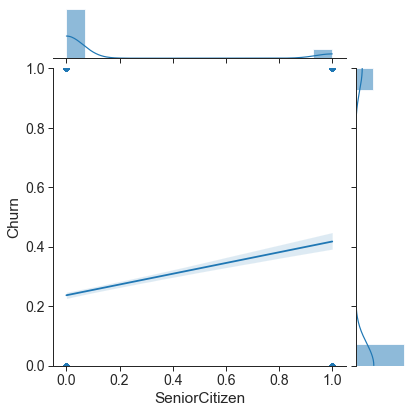

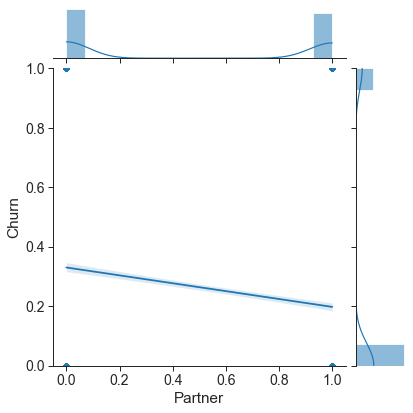

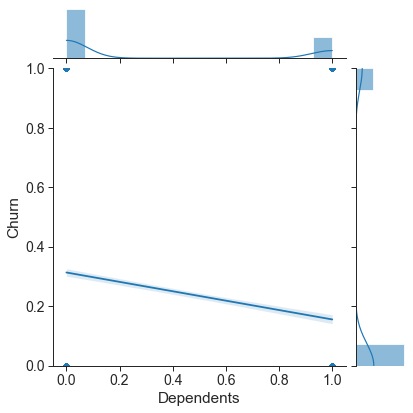

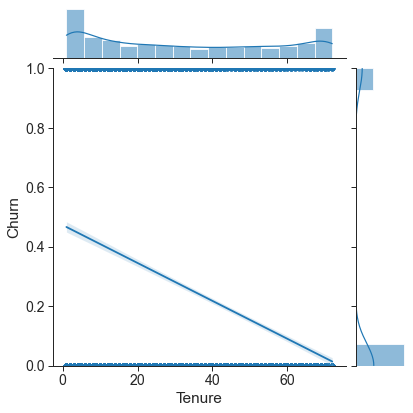

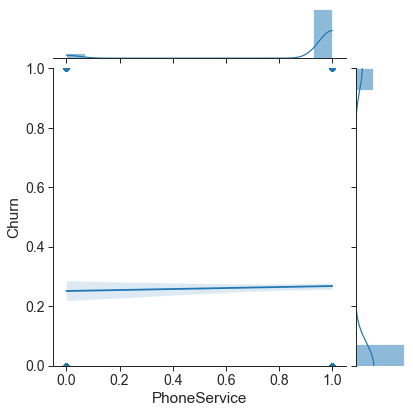

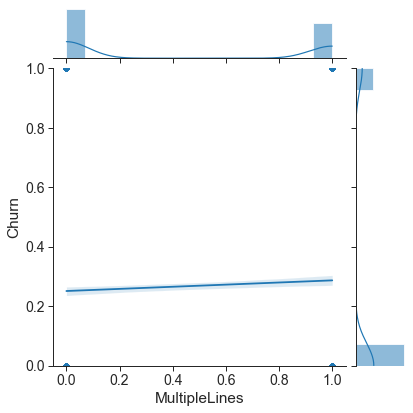

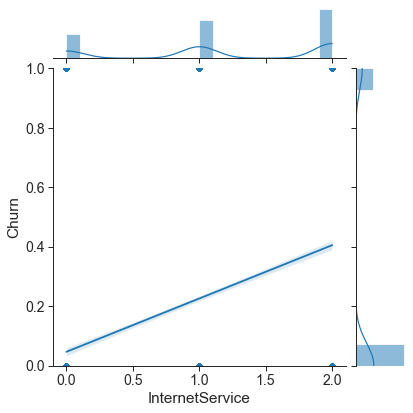

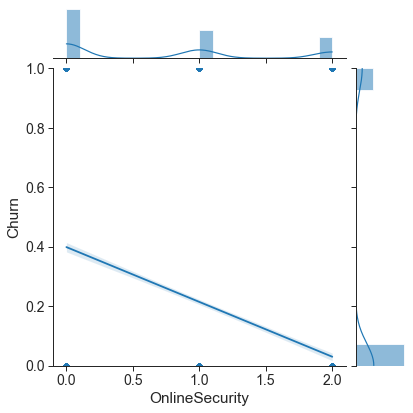

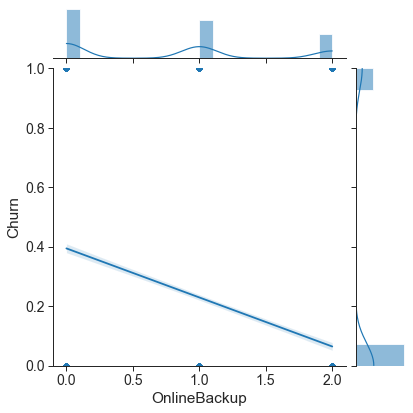

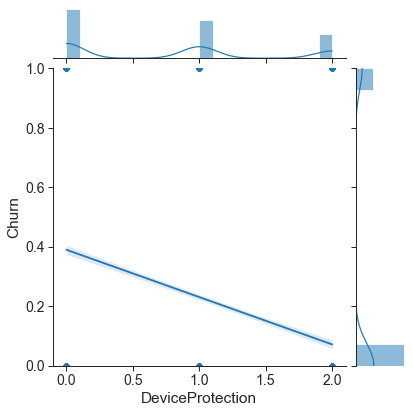

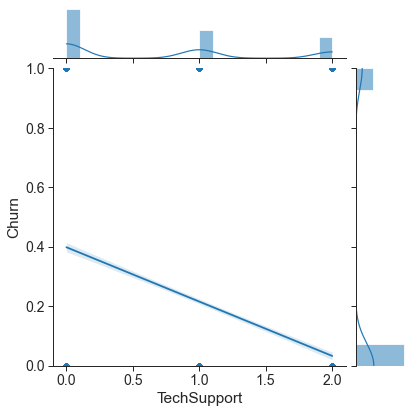

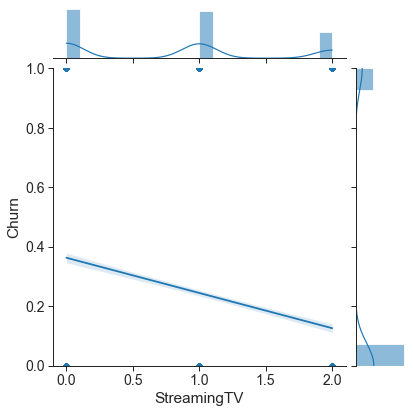

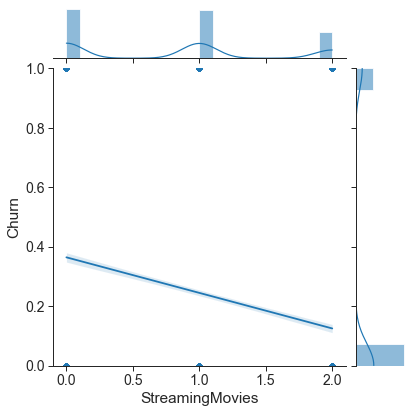

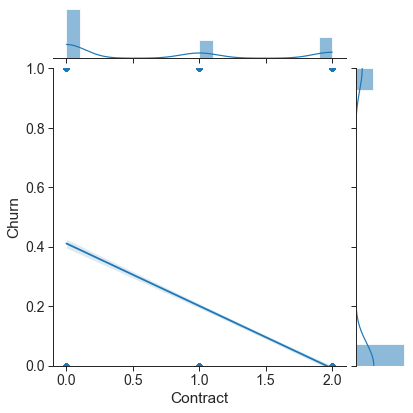

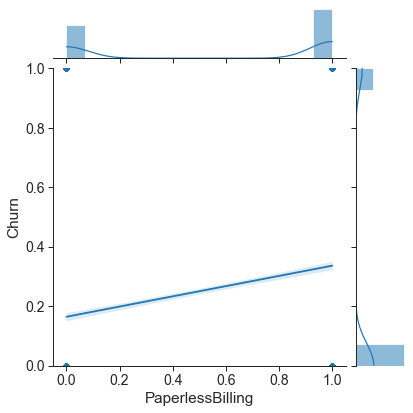

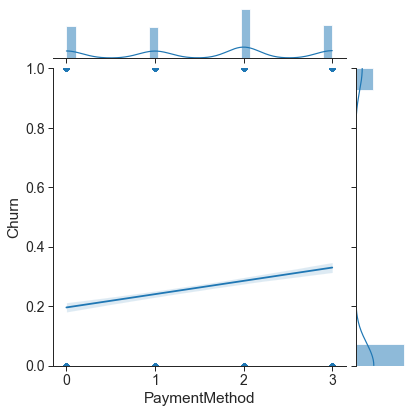

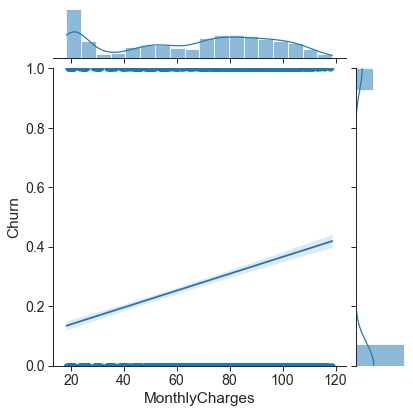

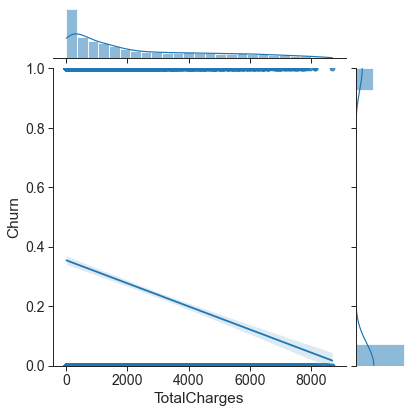

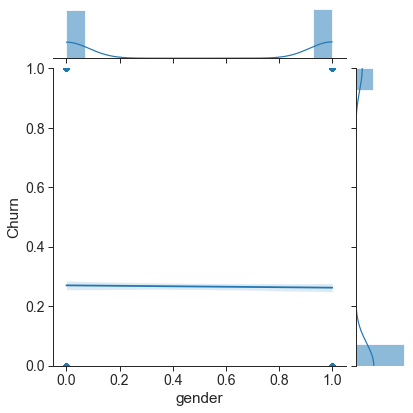

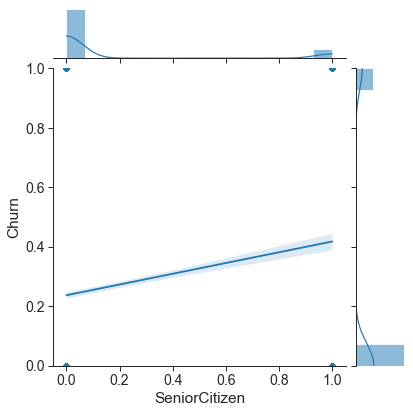

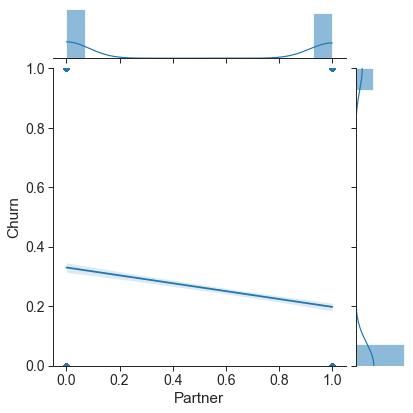

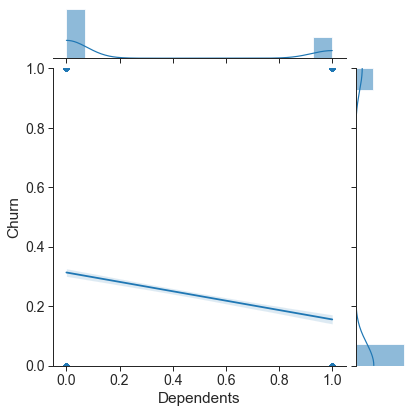

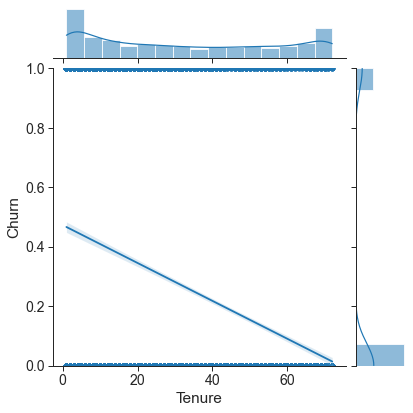

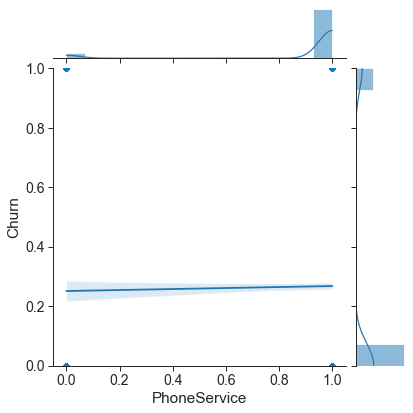

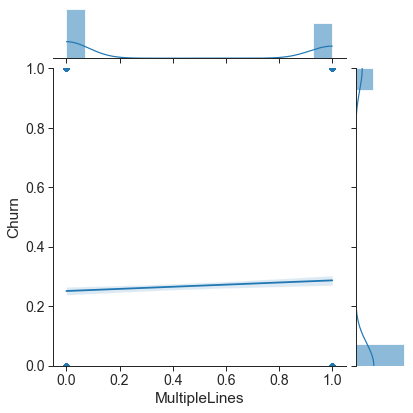

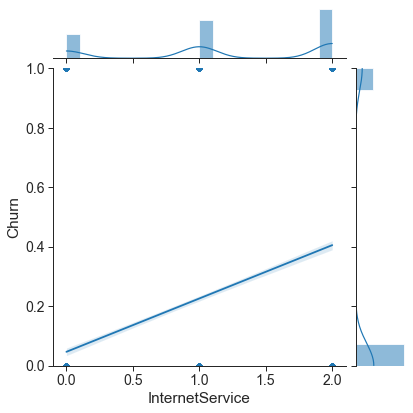

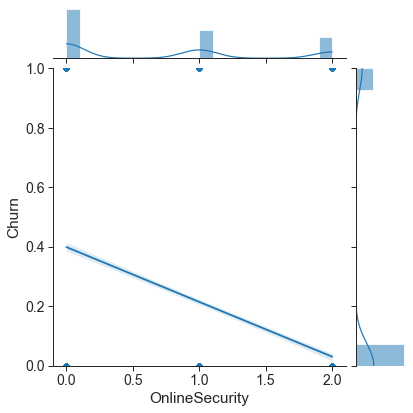

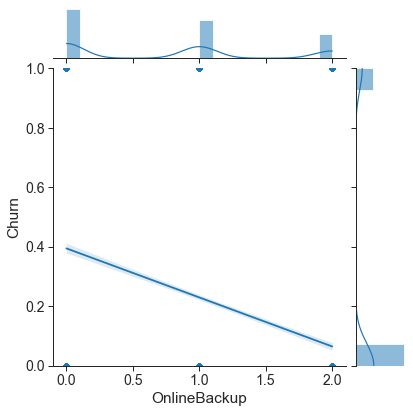

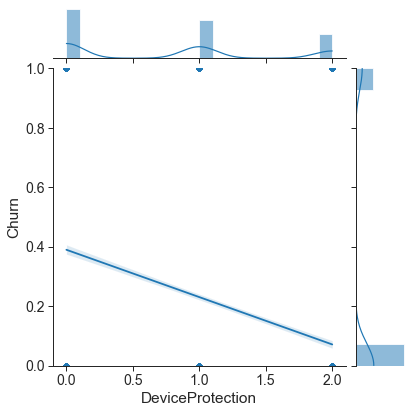

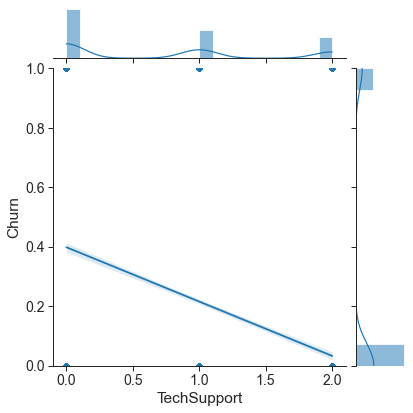

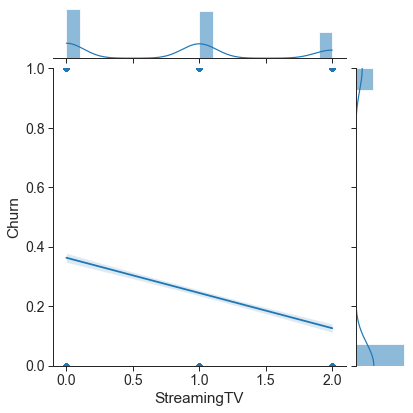

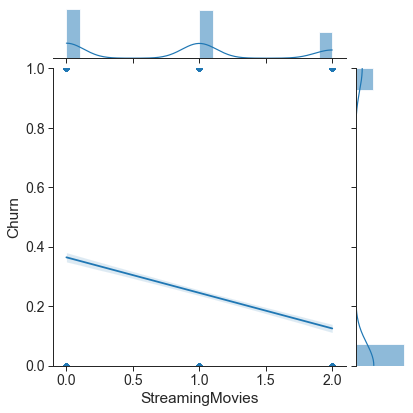

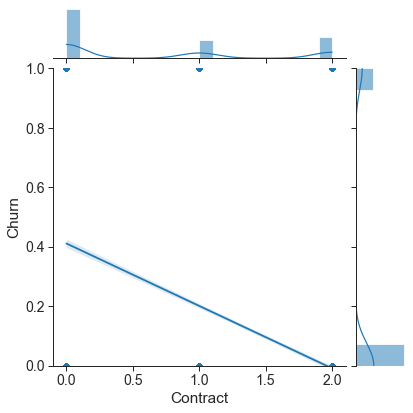

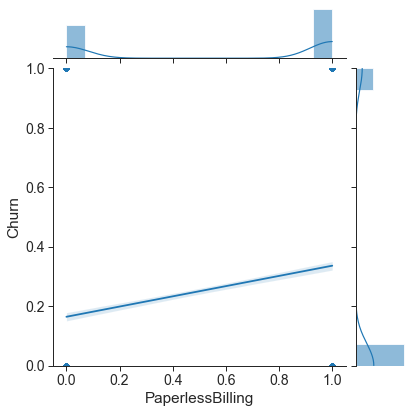

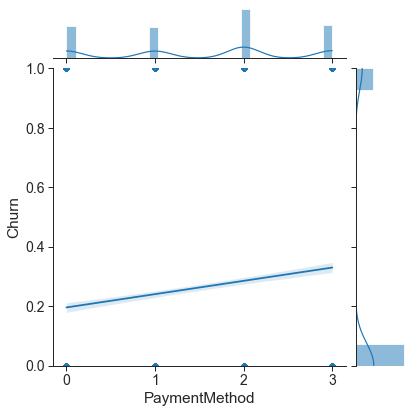

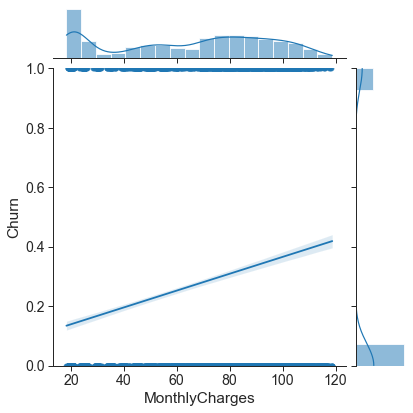

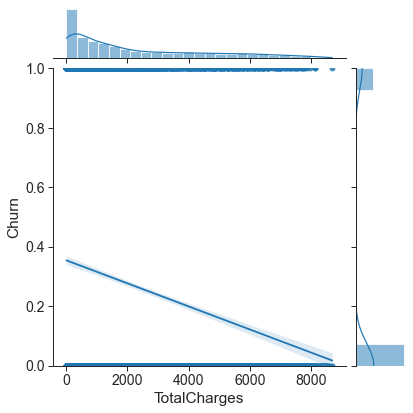

In [16]:
import numpy as np

for column in churn_data.columns[1:np.size(churn_data.columns)-1]:
    sb.jointplot(x=column, y='Churn', data=churn_data, kind='reg')
    plt.ylim(0,1)


In [17]:
churn_mx = churn_data.corr()
churn_mx['Churn']

gender             -0.008808
SeniorCitizen       0.150981
Partner            -0.150037
Dependents         -0.163793
Tenure             -0.354279
PhoneService        0.011206
MultipleLines       0.040069
InternetService     0.316485
OnlineSecurity     -0.332698
OnlineBackup       -0.290827
DeviceProtection   -0.280799
TechSupport        -0.329473
StreamingTV        -0.204822
StreamingMovies    -0.206271
Contract           -0.396594
PaperlessBilling    0.191254
PaymentMethod       0.108129
MonthlyCharges      0.193041
TotalCharges       -0.199691
Churn               1.000000
Name: Churn, dtype: float64

gender             -0.008808
SeniorCitizen       0.150981
Partner            -0.150037
Dependents         -0.163793
Tenure             -0.354279
PhoneService        0.011206
MultipleLines       0.040069
InternetService     0.316485
OnlineSecurity     -0.332698
OnlineBackup       -0.290827
DeviceProtection   -0.280799
TechSupport        -0.329473
StreamingTV        -0.204822
StreamingMovies    -0.206271
Contract           -0.396594
PaperlessBilling    0.191254
PaymentMethod       0.108129
MonthlyCharges      0.193041
TotalCharges       -0.199691
Churn               1.000000
Name: Churn, dtype: float64

In [18]:
churn_mx_tests = churn_data_tests.corr()
churn_mx_tests['Churn']

gender              0.085280
SeniorCitizen       0.013558
Partner            -0.158114
Dependents          0.091287
Tenure             -0.283188
PhoneService        0.181369
MultipleLines       0.021926
InternetService     0.269782
OnlineSecurity     -0.262461
OnlineBackup       -0.375871
DeviceProtection   -0.375871
TechSupport        -0.335900
StreamingTV        -0.360180
StreamingMovies    -0.522043
Contract           -0.247445
PaperlessBilling    0.312500
PaymentMethod       0.014597
MonthlyCharges      0.123386
TotalCharges       -0.132494
Churn               1.000000
Name: Churn, dtype: float64

gender              0.085280
SeniorCitizen       0.013558
Partner            -0.158114
Dependents          0.091287
Tenure             -0.283188
PhoneService        0.181369
MultipleLines       0.021926
InternetService     0.269782
OnlineSecurity     -0.262461
OnlineBackup       -0.375871
DeviceProtection   -0.375871
TechSupport        -0.335900
StreamingTV        -0.360180
StreamingMovies    -0.522043
Contract           -0.247445
PaperlessBilling    0.312500
PaymentMethod       0.014597
MonthlyCharges      0.123386
TotalCharges       -0.132494
Churn               1.000000
Name: Churn, dtype: float64

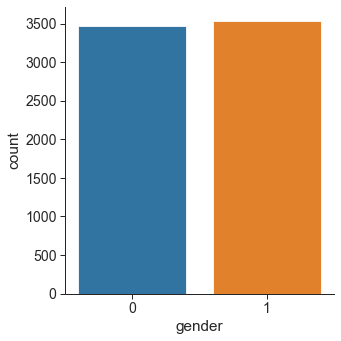

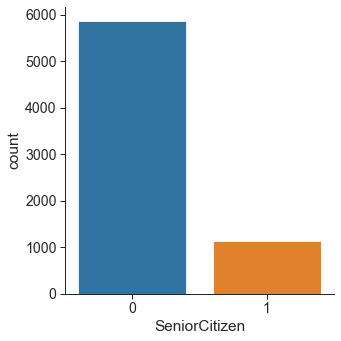

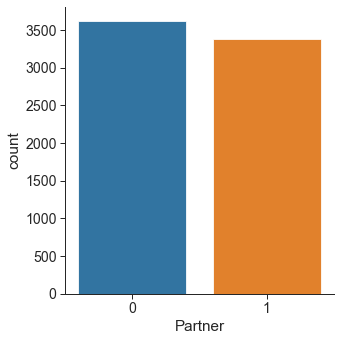

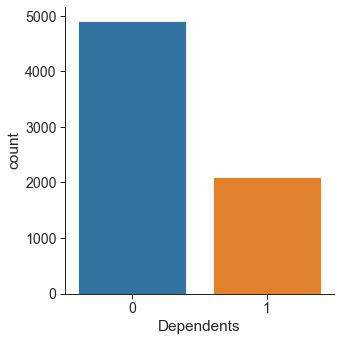

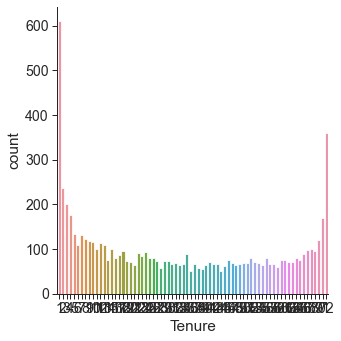

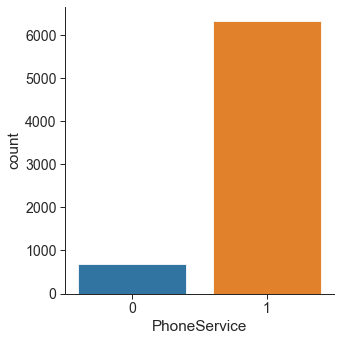

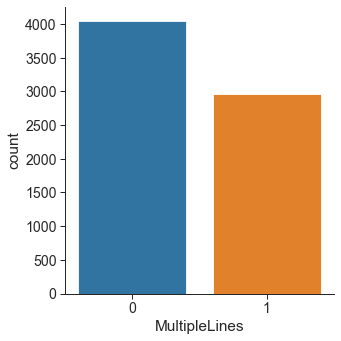

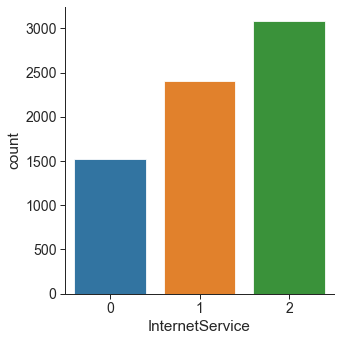

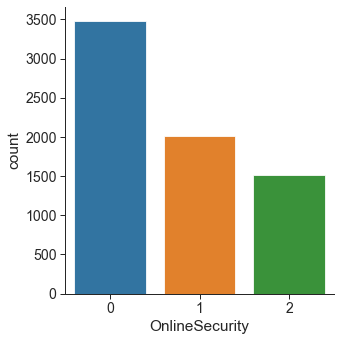

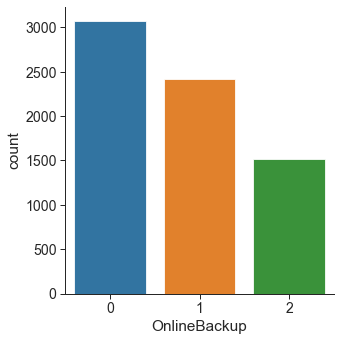

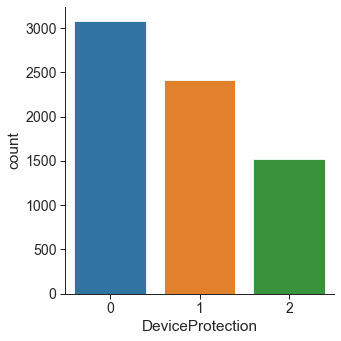

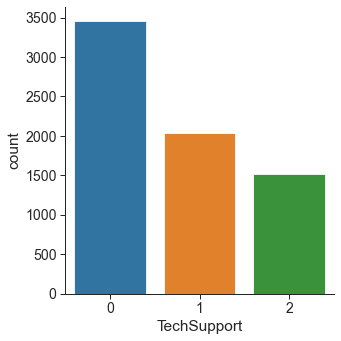

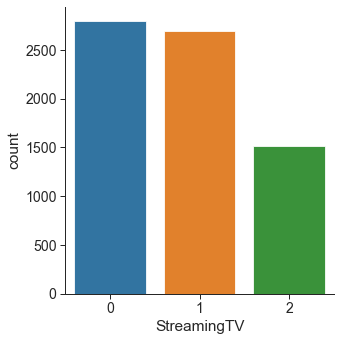

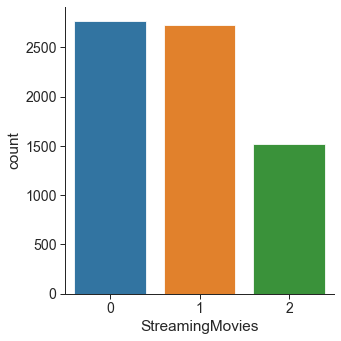

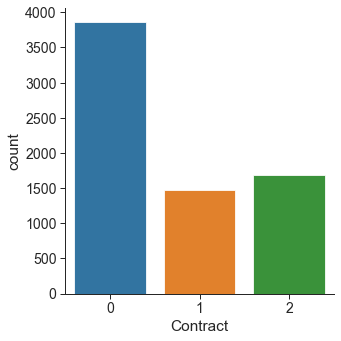

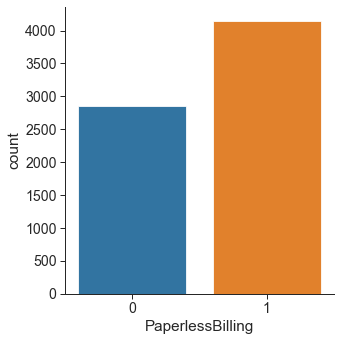

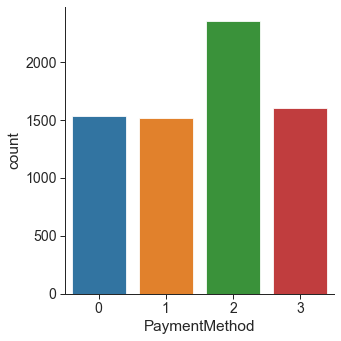

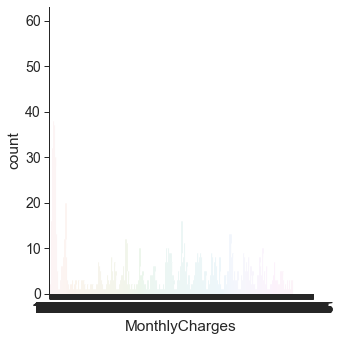

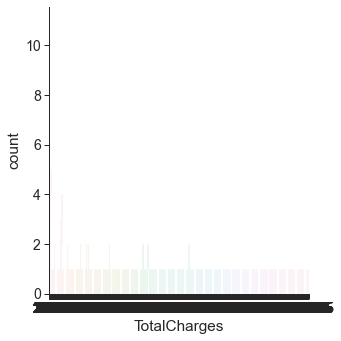

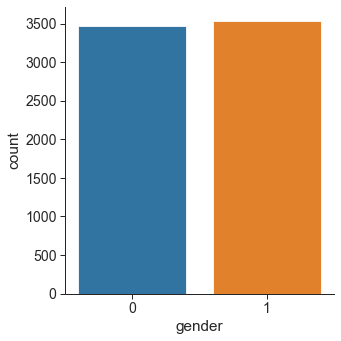

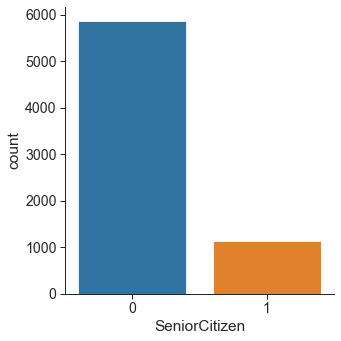

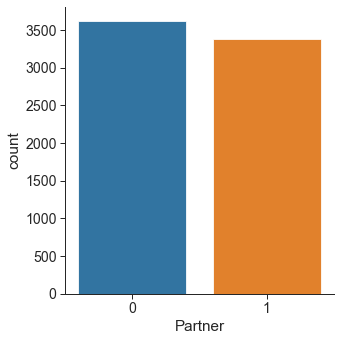

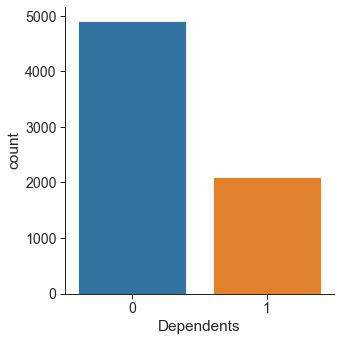

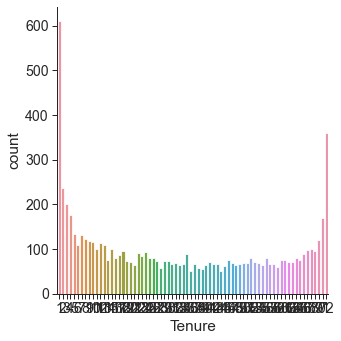

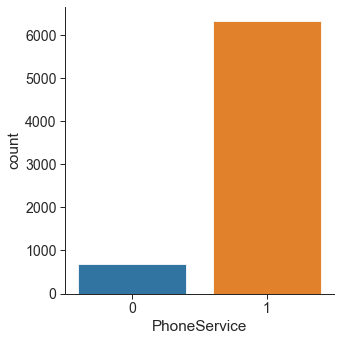

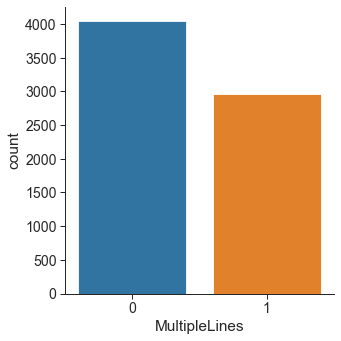

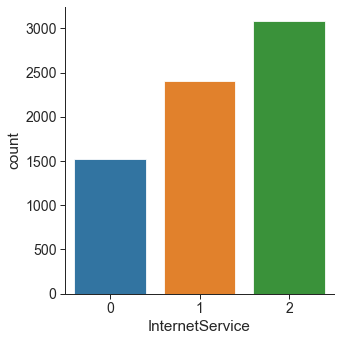

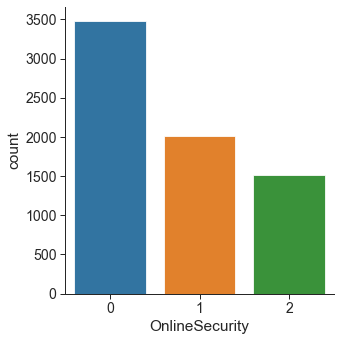

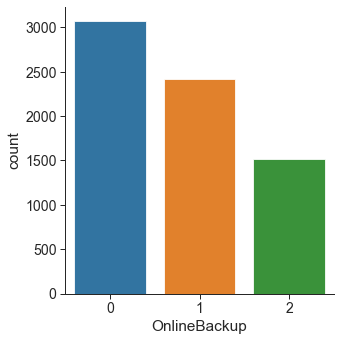

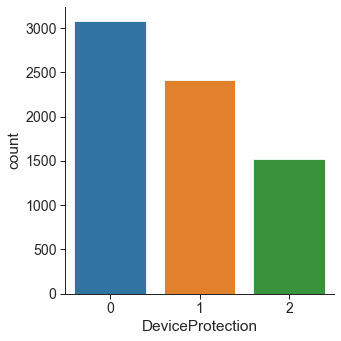

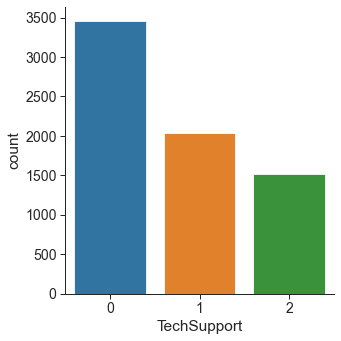

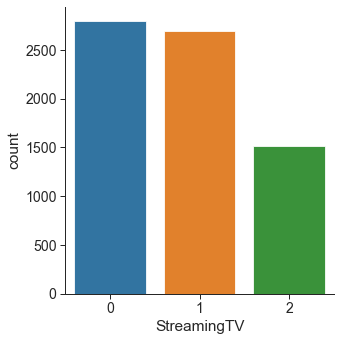

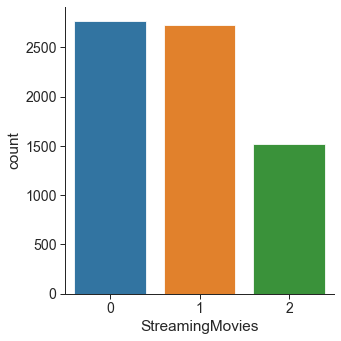

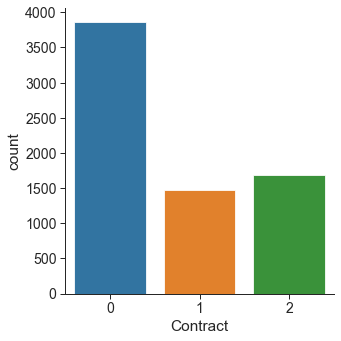

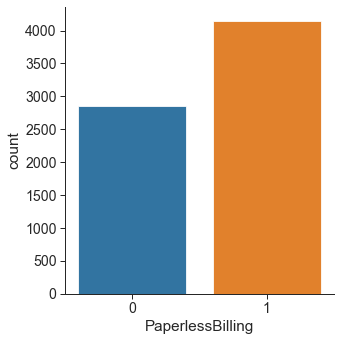

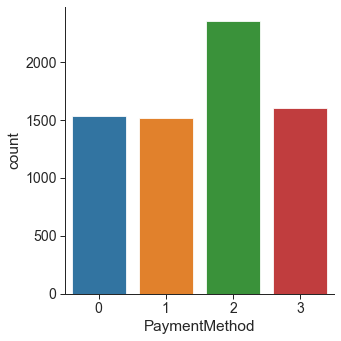

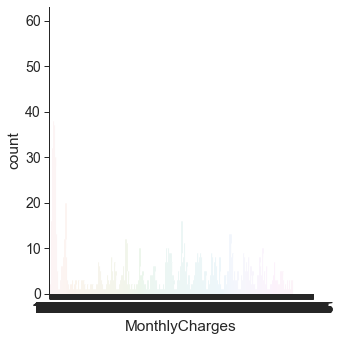

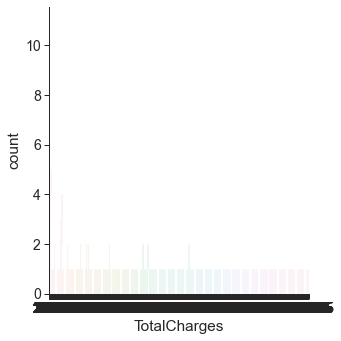

In [19]:
for column in churn_data.columns[1:np.size(churn_data.columns)-1]:
    sb.catplot(x=column, data=churn_data, kind="count")